In [1]:
import pandas as pd
import numpy as np
from fancyimpute import KNN 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

Using TensorFlow backend.


In [2]:
df = pd.read_csv('averaged_data.csv')
df.head()

,DOLocationID,PULocationID,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,target
0,1,4,62.900000,49.172246,15.826000,1889.800000,90.636,0.00,0.0,14.446000,12.600000,0.3,1
1,1,7,90.500000,65.509465,27.660000,2526.500000,112.680,0.00,0.0,0.000000,21.880000,0.3,1
2,1,10,110.000000,71.572720,35.750000,2881.000000,156.575,0.25,0.0,26.095000,19.930000,0.3,1
3,1,12,73.625000,42.373314,18.682500,2961.000000,92.140,0.25,0.0,3.965000,14.000000,0.3,1
4,1,14,128.666667,71.014176,25.406667,2056.333333,188.260,0.00,0.0,27.406667,31.886667,0.3,1


In [3]:
df.describe()

,DOLocationID,PULocationID,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,target
count,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000
mean,135.790210,142.337047,29.413837,32.283984,8.813329,1901.735404,34.812189,0.363043,0.493486,2.921667,1.298803,0.299644,0.440856
std,76.620049,75.947454,16.537007,49.966328,5.664794,3087.516378,20.179123,0.341583,0.047145,3.518043,3.231613,0.006575,0.496500
min,1.000000,1.000000,0.000000,0.000000,0.000000,-607.909465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,79.000000,17.238068,22.174323,4.398989,1119.000000,20.300000,0.200000,0.500000,0.540152,0.000000,0.300000,0.000000
50%,137.000000,143.000000,26.812500,29.893698,7.865000,1586.649254,31.300000,0.366667,0.500000,2.084402,0.000000,0.300000,0.000000
75%,202.000000,216.000000,39.000000,39.348012,12.331667,2130.944444,45.176700,0.500000,0.500000,3.984500,0.960000,0.300000,1.000000
max,265.000000,265.000000,286.500000,7012.619919,77.956667,86344.000000,363.380000,12.500000,0.500000,116.230000,194.748000,0.300000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24863 entries, 0 to 24862
Data columns (total 13 columns):
DOLocationID             24863 non-null int64
PULocationID             24863 non-null int64
fare_amount              24863 non-null float64
speed                    24863 non-null float64
trip_distance            24863 non-null float64
duration                 24863 non-null float64
total_amount             24863 non-null float64
extra                    24863 non-null float64
mta_tax                  24863 non-null float64
tip_amount               24863 non-null float64
tolls_amount             24863 non-null float64
improvement_surcharge    24863 non-null float64
target                   24863 non-null int64
dtypes: float64(10), int64(3)
memory usage: 2.5 MB


Here we can see that there is no missing values. So, any imputation not required at this point.

In [5]:
data = df.drop(['DOLocationID','PULocationID'],axis=1)
data.duration = data.duration/60
data.head()

,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,target
0,62.900000,49.172246,15.826000,31.496667,90.636,0.00,0.0,14.446000,12.600000,0.3,1
1,90.500000,65.509465,27.660000,42.108333,112.680,0.00,0.0,0.000000,21.880000,0.3,1
2,110.000000,71.572720,35.750000,48.016667,156.575,0.25,0.0,26.095000,19.930000,0.3,1
3,73.625000,42.373314,18.682500,49.350000,92.140,0.25,0.0,3.965000,14.000000,0.3,1
4,128.666667,71.014176,25.406667,34.272222,188.260,0.00,0.0,27.406667,31.886667,0.3,1


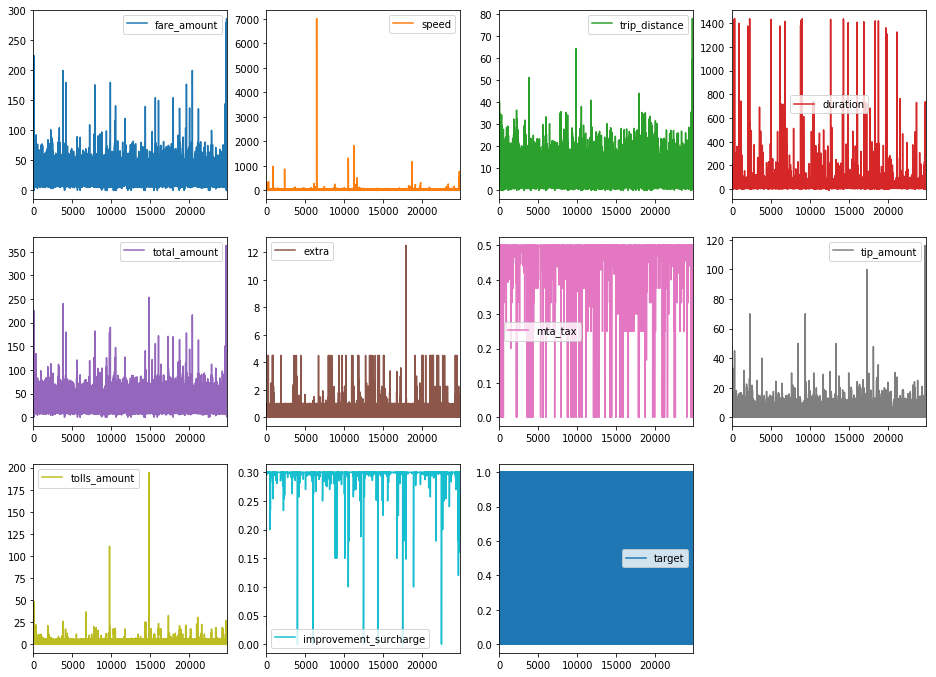

In [6]:
#line plot of all features and target
data.plot(kind='line',subplots=True, layout=(4,4), sharex=False,figsize=(16,16))
plt.show()

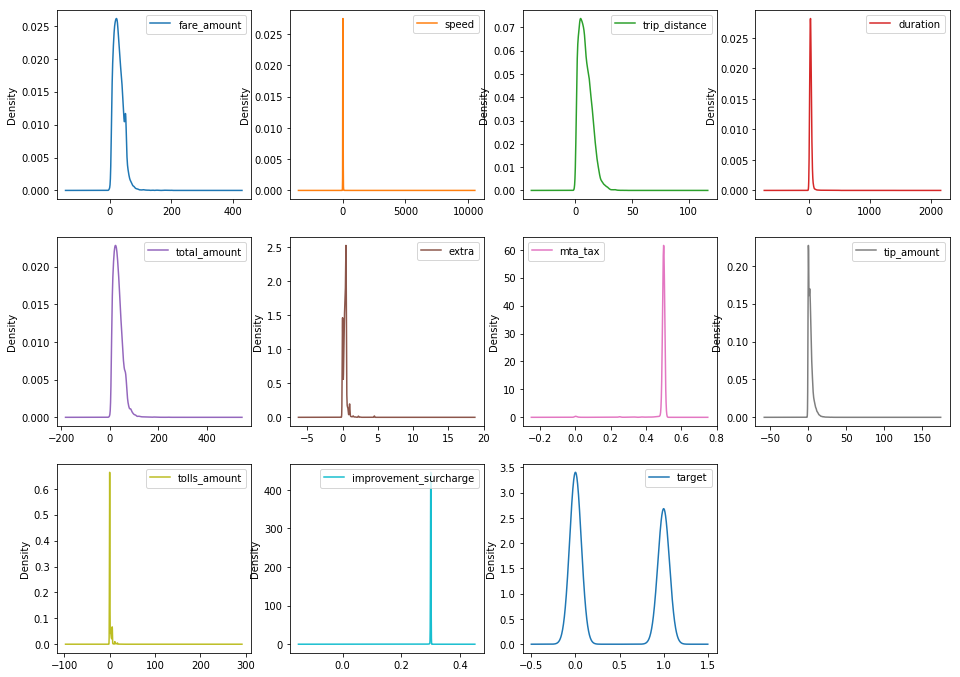

In [7]:
#Density plot of all features and target
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False,figsize=(16,16))
plt.show()

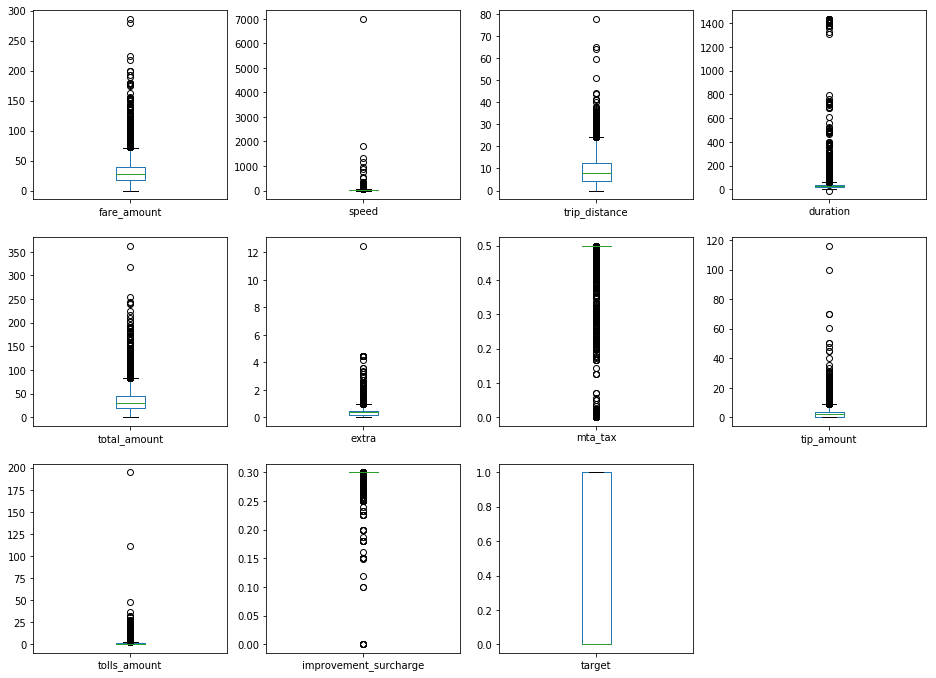

In [8]:
#box plot of all features and target
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(16,16))
plt.show()

From above plots we can see that in some cases speed is in 1000's which is impossible for any road vehicle to reach this speed value and hence we can say that there are many wrong values in data.

Here, 1st we will replace values with None where speed is more than 150 as it's vary extreame case for any road vehicle.

In [9]:
#removing value if speed is more than 150
data.speed = data.speed.apply(lambda x: np.nan if x > 150 else x)

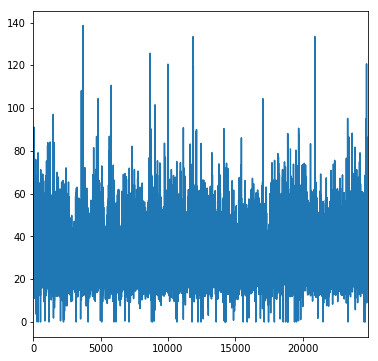

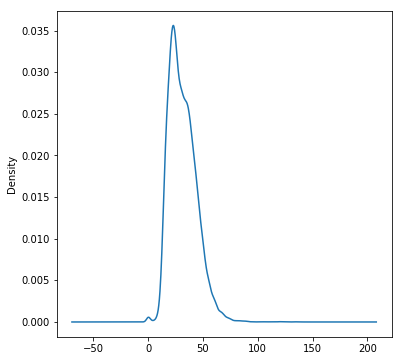

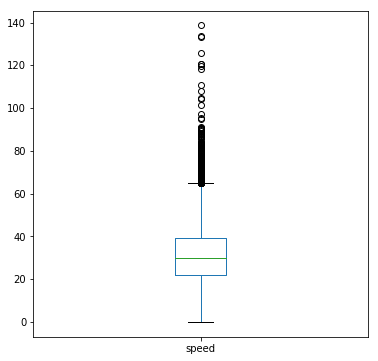

In [10]:
#plotting speed after removing values > 150 
data.speed.plot(kind='line',sharex=False,figsize=(6,6))
plt.show()
data.speed.plot(kind='density', sharex=False,figsize=(6,6))
plt.show()
data.speed.plot(kind='box',sharex=False, sharey=False,figsize=(6,6))
plt.show()

As we can there are many outliers in data. So, first we will replace these values with nan

In [11]:
#removing extreme value from data
def find_anomalies(x,std,mean):
    # Set upper and lower limit to 3 standard deviation
    anomaly_cut_off = std * 3
    lower_limit  = mean - anomaly_cut_off 
    upper_limit = mean + anomaly_cut_off
    if x > upper_limit or x < lower_limit:
        return np.nan
    return x

std_all = data.std()
mean_all = data.mean()
data_no_outlier = pd.DataFrame()
for col in data.columns:
    data_no_outlier[col] = data[col].apply(lambda x:find_anomalies(x,std_all[col],mean_all[col]))
data_no_outlier.head()

,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,target
0,62.900,49.172246,15.826000,31.496667,90.636,0.00,NaN,NaN,NaN,0.3,1
1,NaN,65.509465,NaN,42.108333,NaN,0.00,NaN,0.000,NaN,0.3,1
2,NaN,NaN,NaN,48.016667,NaN,0.25,NaN,NaN,NaN,0.3,1
3,73.625,42.373314,18.682500,49.350000,92.140,0.25,NaN,3.965,NaN,0.3,1
4,NaN,NaN,25.406667,34.272222,NaN,0.00,NaN,NaN,NaN,0.3,1


In [12]:
#number of missing value after removing extreme values 
data_no_outlier.isna().sum()

fare_amount              206
speed                    201
trip_distance            218
duration                 154
total_amount             259
extra                    247
mta_tax                  379
tip_amount               372
tolls_amount             677
improvement_surcharge     82
target                     0
dtype: int64

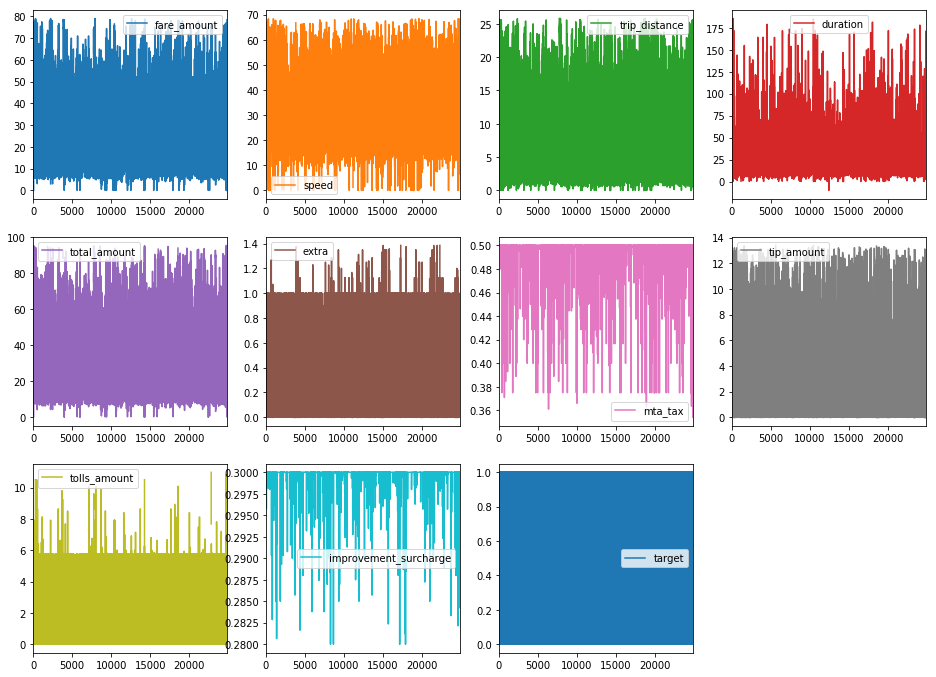

In [13]:
#line plot of all features and target data without extreme values
data_no_outlier.plot(kind='line',subplots=True, layout=(4,4), sharex=False,figsize=(16,16))
plt.show()

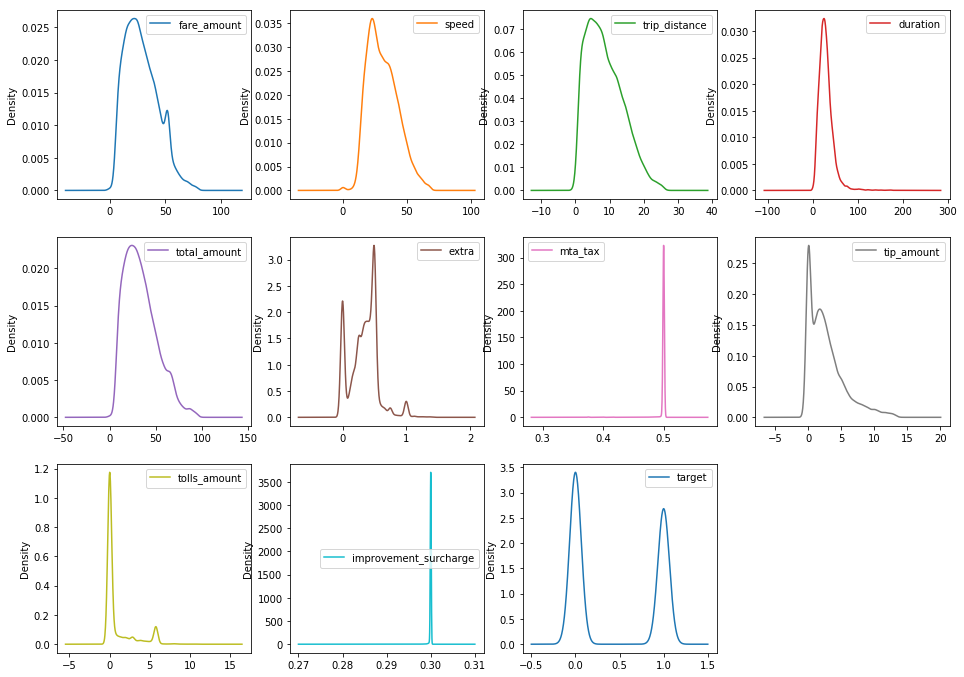

In [14]:
#density plot of all features and target data without extreme values
data_no_outlier.plot(kind='density', subplots=True, layout=(4,4), sharex=False,figsize=(16,16))
plt.show()

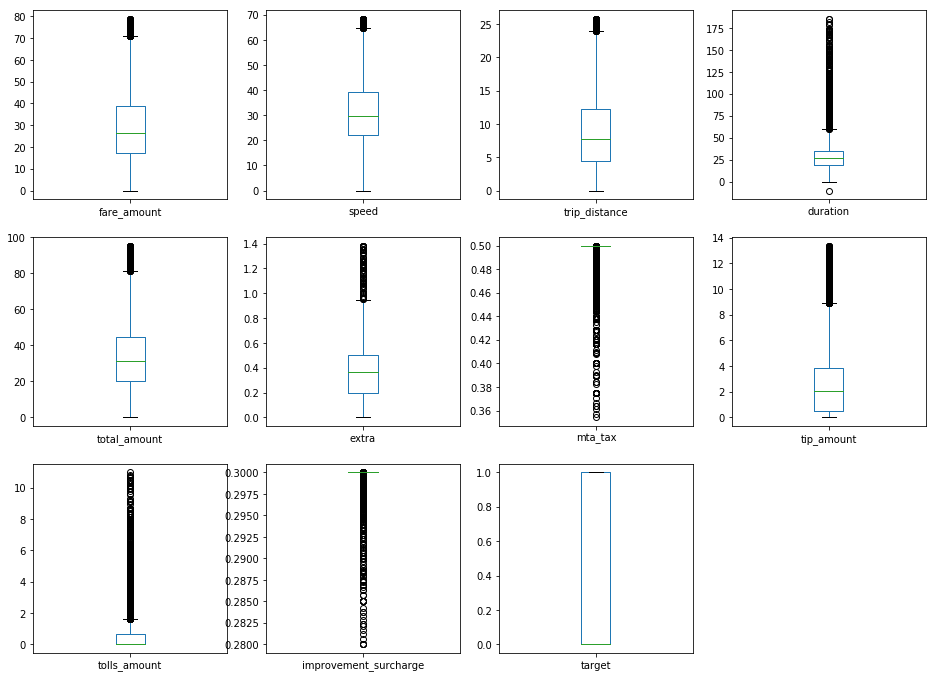

In [15]:
#box plot of all features and target data without extreme values
data_no_outlier.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(16,16))
plt.show()

From above plots we can see than some of the values are not in 75% quartile but as it can show some pattern in data, we will keep these value for modelling.

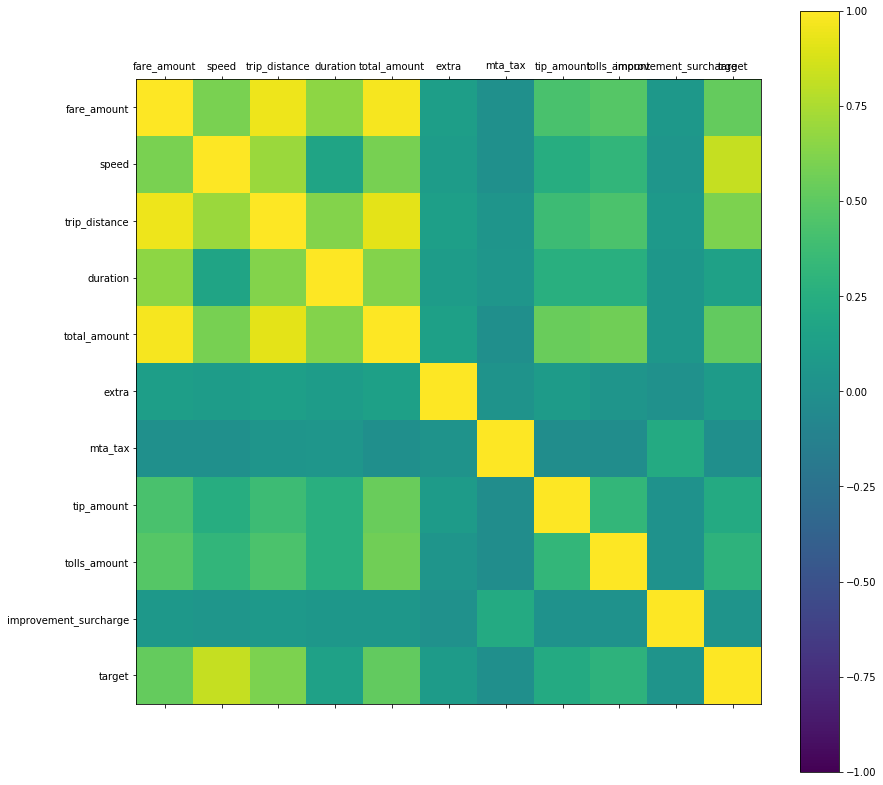

In [16]:
#plotting correlation between columns for data without extreme values
names = data_no_outlier.columns
correlations = data_no_outlier.corr()

# plot correlation matrix
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

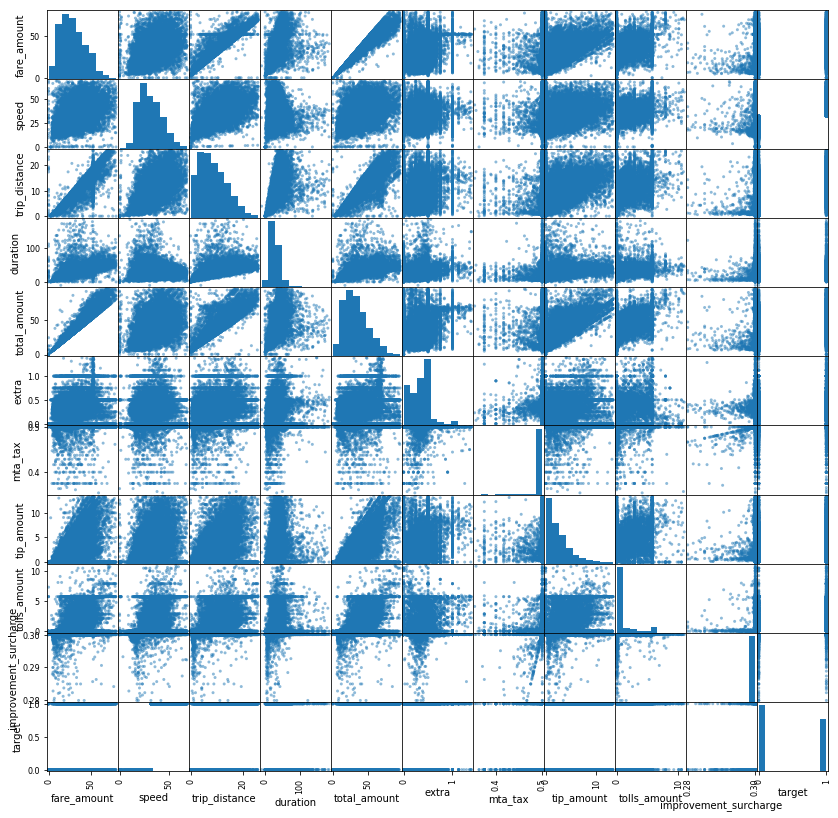

In [17]:
#scatter plot for all feature combination for data without extreme values
scatter_matrix(data_no_outlier, figsize=(14,14))
plt.show()

In [ ]:
#filling missing value using KNN
data_processed = KNN(k=3).fit_transform(data_no_outlier)
data_processed.shape
data_processed = pd.DataFrame(data_processed,columns = data_no_outlier.columns)

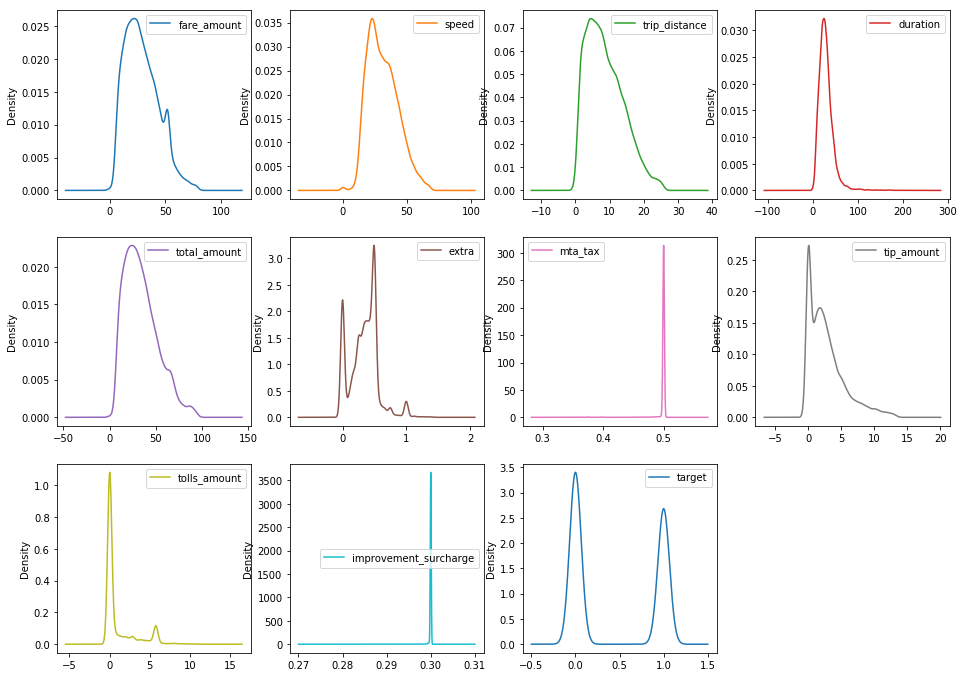

In [20]:
#density plot for all feature for data without extreme values and without missing values
data_processed.plot(kind='density', subplots=True, layout=(4,4), sharex=False,figsize=(16,16))
plt.show()

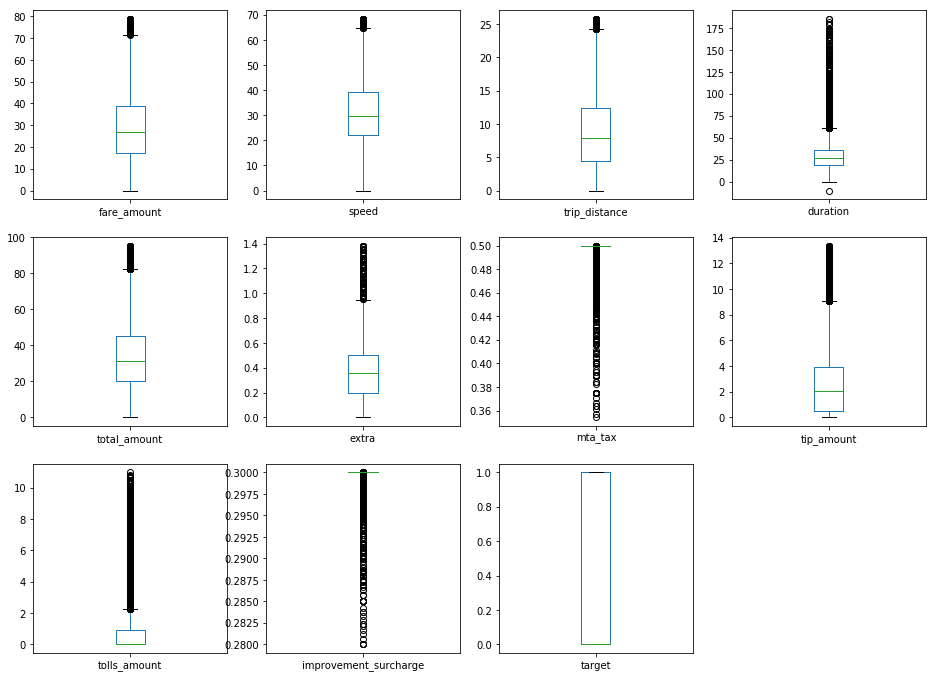

In [21]:
#box plot for all feature for data without extreme values and without missing values
data_processed.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(16,16))
plt.show()

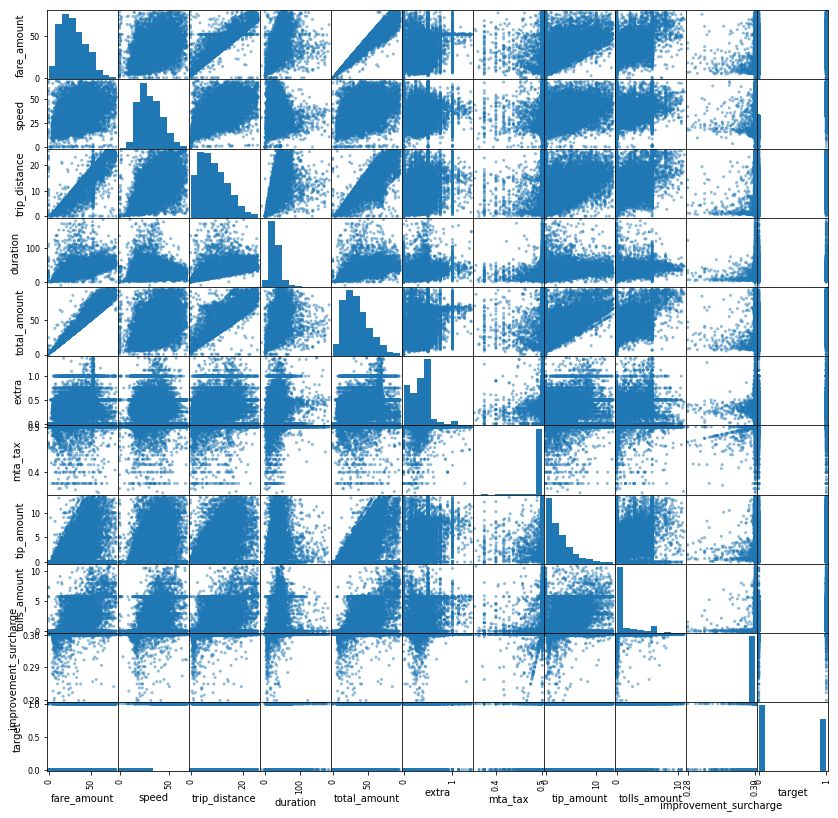

In [22]:
#scatter plot for all feature combination for data without extreme values and without missing values
scatter_matrix(data_processed,figsize=(14,14))
plt.show()

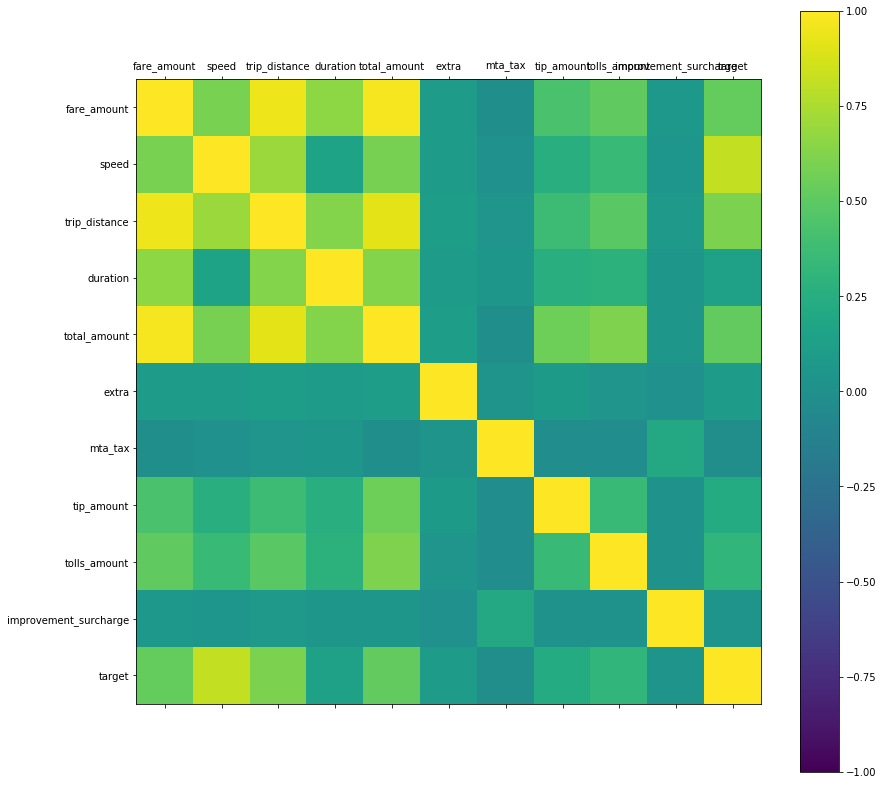

In [23]:
#plotting correlation between columns for data without extreme values and without missing values
names = data_processed.columns
correlations = data_processed.corr()

# plot correlation matrix
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

Here, we can see that correlation of feature 'improvement_surcharge', 'mta_tax' and 'extra' is verry less with respects to all other features. So, we will remove these feature from modelling as it's not giving much information to model our target value. 

Also, we can see that correlation of target value with 'speed' is more compared to any other feature. This, should relation should exist as target value is derived based on 'speed' with hypothesis testing. 


In [24]:
#removing feature with low correlation value
data_final = data_processed.drop(['improvement_surcharge','mta_tax','extra'],axis=1)
data_final.head()

,fare_amount,speed,trip_distance,duration,total_amount,tip_amount,tolls_amount,target
0,62.900000,49.172246,15.826000,31.496667,90.636000,5.341091,0.209422,1.0
1,76.827013,65.509465,25.703907,42.108333,80.827304,0.000000,3.163483,1.0
2,46.523810,37.902972,15.083968,48.016667,61.130556,9.181508,3.565714,1.0
3,73.625000,42.373314,18.682500,49.350000,92.140000,3.965000,8.431486,1.0
4,66.575258,35.543693,25.406667,34.272222,90.740151,0.000000,9.376871,1.0


In [25]:
data_final.describe()

,fare_amount,speed,trip_distance,duration,total_amount,tip_amount,tolls_amount,target
count,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000
mean,29.016591,31.245057,8.733039,28.781679,34.289841,2.734881,1.024839,0.440856
std,14.944074,11.670911,5.402780,16.206060,18.137193,2.747039,1.967499,0.496500
min,0.000000,0.000000,0.000000,-10.131824,0.000000,0.000000,0.000000,0.000000
25%,17.228076,22.108060,4.398377,18.633333,20.300000,0.532198,0.000000,0.000000
50%,26.800000,29.764673,7.864364,26.424427,31.292500,2.071250,0.000000,0.000000
75%,39.000000,39.129767,12.322235,35.438909,45.111250,3.944093,0.909474,1.000000
max,79.000000,68.470272,25.800000,185.594444,95.320000,13.390000,10.971429,1.000000


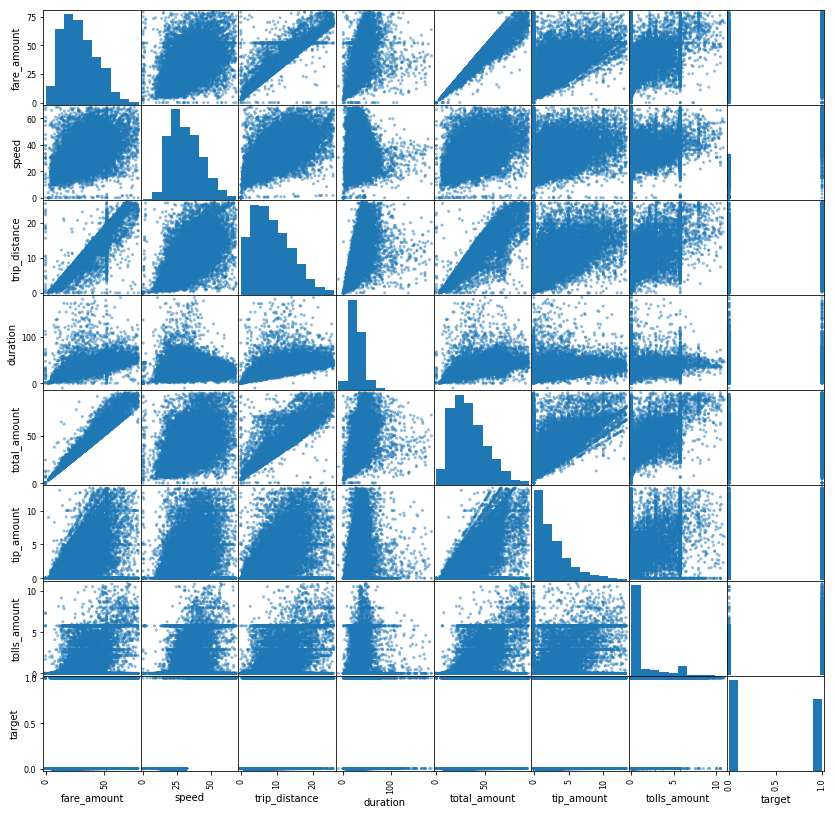

In [26]:
#scatter plot for all feature combination for final data
scatter_matrix(data_final,figsize=(14,14))
plt.show()

In [27]:
data_final.to_csv('data_final.csv',index=False)